In [5]:
setwd('/import/hd//sc')

In [6]:
getwd()

[1] "/import/hd/sc"

In [7]:
library(Seurat)

In [22]:
immune.combined = readRDS('./endo.rds')

In [41]:
scRNAlist =  SplitObject(immune.combined, split.by = "orig.ident")
scRNA_harmony <- merge(scRNAlist[[1]], y=scRNAlist[2:length(scRNAlist)])
DefaultAssay(scRNA_harmony) = 'RNA'
library(harmony)
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- RunTSNE(scRNA_harmony, reduction = "harmony", dims = 1:30)
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution =  0.05)
##作图
#group_by_cluster
plot1 = DimPlot(scRNA_harmony, reduction = "umap", label=T) 

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony converged after 4 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
  7.618   4.181   6.020 

13:54:48 UMAP embedding parameters a = 0.9922 b = 1.112

13:54:48 Read 12465 rows and found 30 numeric columns

13:54:48 Using Annoy for neighbor search, n_neighbors = 30

13:54:48 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:54:50 Writing NN index file to temp file /tmp/Rtmp1ZtuQR/file30474523d1a13

13:54:50 Searching Annoy index using 1 thread, search_k = 3000

13:54:53 Annoy recall = 100%

13:54:53 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

13:54:54 Initializing from normalized Laplacian + noise (using irlba)

13:54:55 Commencing optimization for 200 epochs, with 559962 positive edges

13:55:09 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 12465
Number of edges: 523110

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9796
Number of communities: 10
Elapsed time: 3 seconds


In [42]:
table(scRNA_harmony$seurat_clusters)


   0    1    2    3    4    5    6    7    8    9 
6553 2531 1140  808  527  378  223  155   89   61 

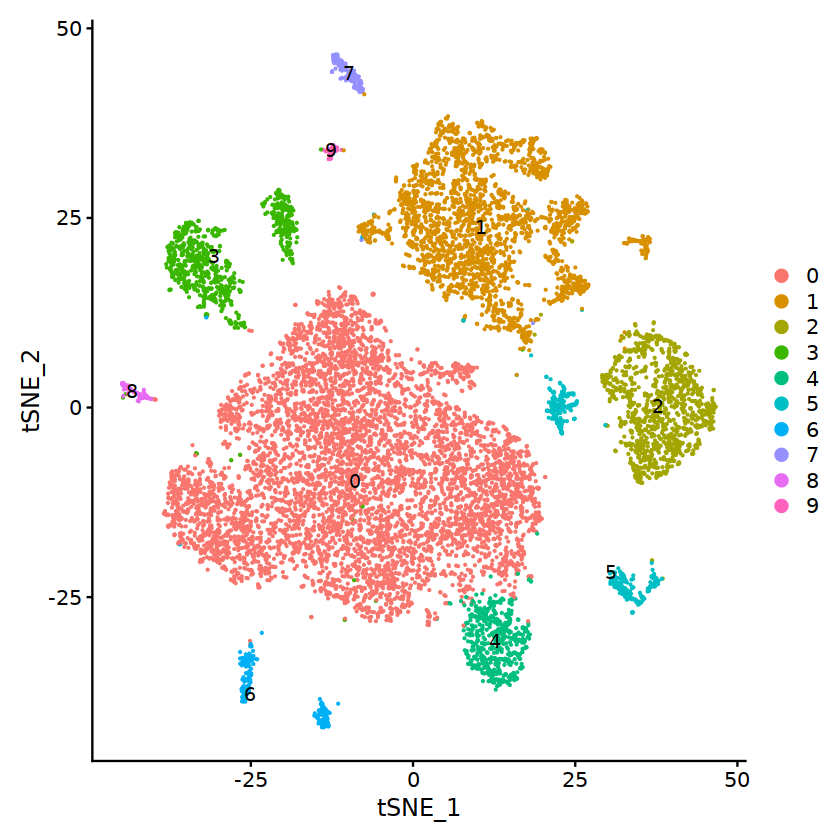

In [43]:
DimPlot(scRNA_harmony, reduction = "tsne", label=T) 

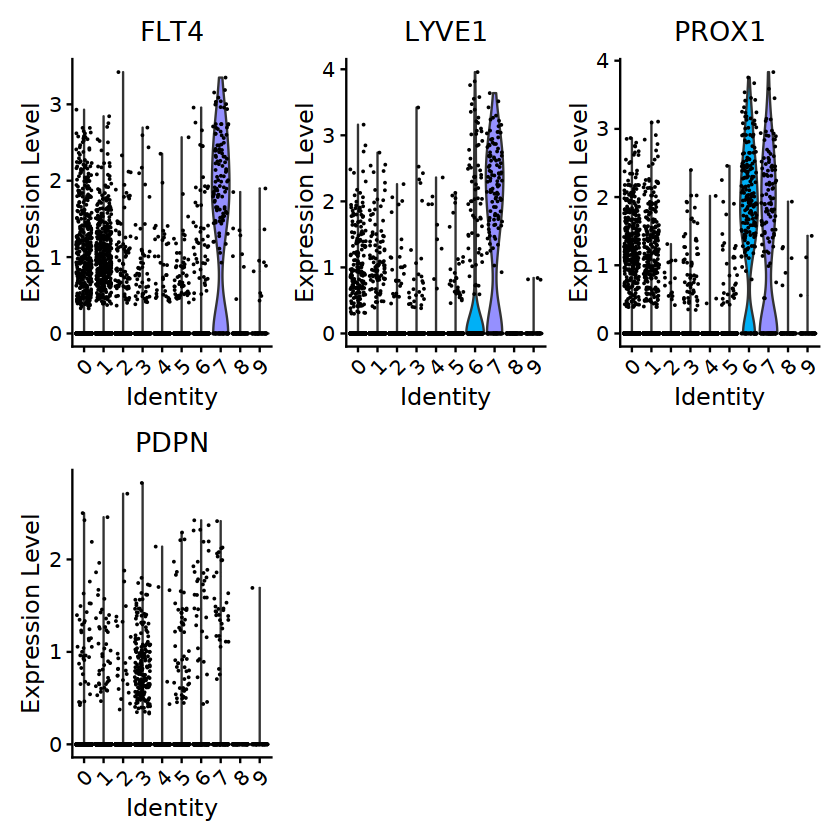

In [44]:
VlnPlot(scRNA_harmony,features = c('FLT4','LYVE1','PROX1','PDPN'))

In [45]:
scRNA = scRNA_harmony

library(Seurat) ##
library(SingleR)
library(ggplot2)
library(reshape2)
mouseImmu  = get(load('/import/DB/SingleR_ref/ref_Human_all.RData'))

pbmc_for_SingleR <- GetAssayData(scRNA, slot="data") ##获取标准化矩阵
clusters=scRNA@meta.data$seurat_clusters

pred.mouseImmu <- SingleR(test = pbmc_for_SingleR, ref = mouseImmu, labels = mouseImmu$label.main,
 method = "cluster", clusters = clusters, 
 assay.type.test = "logcounts", assay.type.ref = "logcounts")
celltype = data.frame(ClusterID=rownames(pred.mouseImmu), celltype=pred.mouseImmu$labels, stringsAsFactors = FALSE)

celltype$celltype = c('E0','E1','E2','E3','E4','E5','E6','E7_LEC','E8','E9')

scRNA@meta.data$celltype = "NA"
# 赋值
for(i in 1:nrow(celltype)){
  scRNA@meta.data[which(scRNA@meta.data$seurat_clusters == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}

Warning message:
"package 'SingleR' was built under R version 4.2.3"
Loading required package: SummarizedExperiment

Warning message:
"package 'SummarizedExperiment' was built under R version 4.2.2"
Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.3"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCou

In [46]:
saveRDS(scRNA,file= 'scRNA.Endo.rds')

In [17]:
library(ggplot2)

ggsave('LEC.pdf',width = 9,height = 9)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [33]:
LEC = scRNA_harmony@meta.data %>%  dplyr::filter(seurat_clusters == 8) %>%  rownames()

In [34]:
saveRDS(LEC,file= 'LEC.rds')

In [27]:
scRNA_harmony

An object of class Seurat 
38601 features across 1420 samples within 2 assays 
Active assay: RNA (36601 features, 2000 variable features)
 1 other assay present: integrated
 3 dimensional reductions calculated: pca, harmony, umap

In [5]:
ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")

testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)

DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 50, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:30)


Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1481 anchors

Filtering anchors

	Retained 1044 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1220 anchors

Filtering anchors

	Retained 1106 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1781 anchors

Filtering anchors

	Retained 1541 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1451 anchors

Filtering anchors

	Retained 1001 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2898 anchors

Filtering anchors

	Retained 1933 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1712 anchors

Filtering anchors

	Retained 1117 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1282 anchors


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4817
Number of edges: 231784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8523
Number of communities: 12
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
05:03:33 UMAP embedding parameters a = 0.9922 b = 1.112

05:03:33 Read 4817 rows and found 30 numeric columns

05:03:33 Using Annoy for neighbor search, n_neighbors = 30

05:03:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:03:34 Writing NN index file to temp file /tmp/RtmpttXccN/file130da289575f3

05:03:34 Searching Annoy index using 1 thread, search_k = 3000

05:03:35 Annoy recall = 100%

05:03:35 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [9]:
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.3)
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:30)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:30)

immune.combined = testAB.integrated

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4817
Number of edges: 231784

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8892
Number of communities: 11
Elapsed time: 1 seconds


05:04:47 UMAP embedding parameters a = 0.9922 b = 1.112

05:04:47 Read 4817 rows and found 30 numeric columns

05:04:47 Using Annoy for neighbor search, n_neighbors = 30

05:04:47 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

05:04:47 Writing NN index file to temp file /tmp/RtmpttXccN/file130da6189f02a

05:04:47 Searching Annoy index using 1 thread, search_k = 3000

05:04:48 Annoy recall = 100%

05:04:49 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

05:04:49 Initializing from normalized Laplacian + noise (using irlba)

05:04:49 Commencing optimization for 500 epochs, with 213960 positive edges

05:05:03 Optimization finished



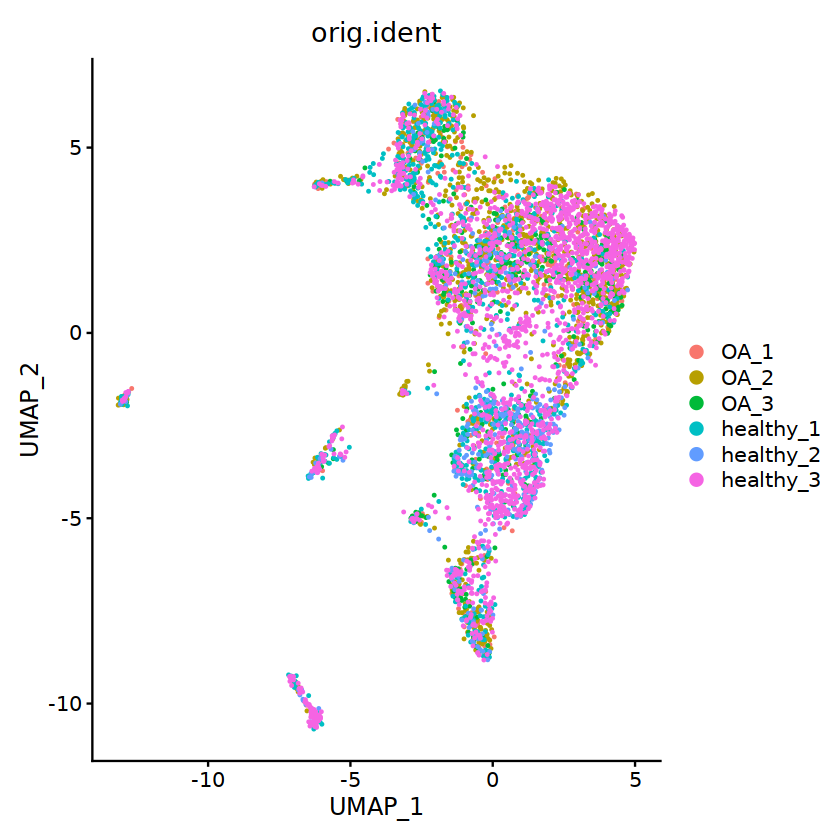

In [10]:
DimPlot(immune.combined, reduction = "umap", group.by = "orig.ident")

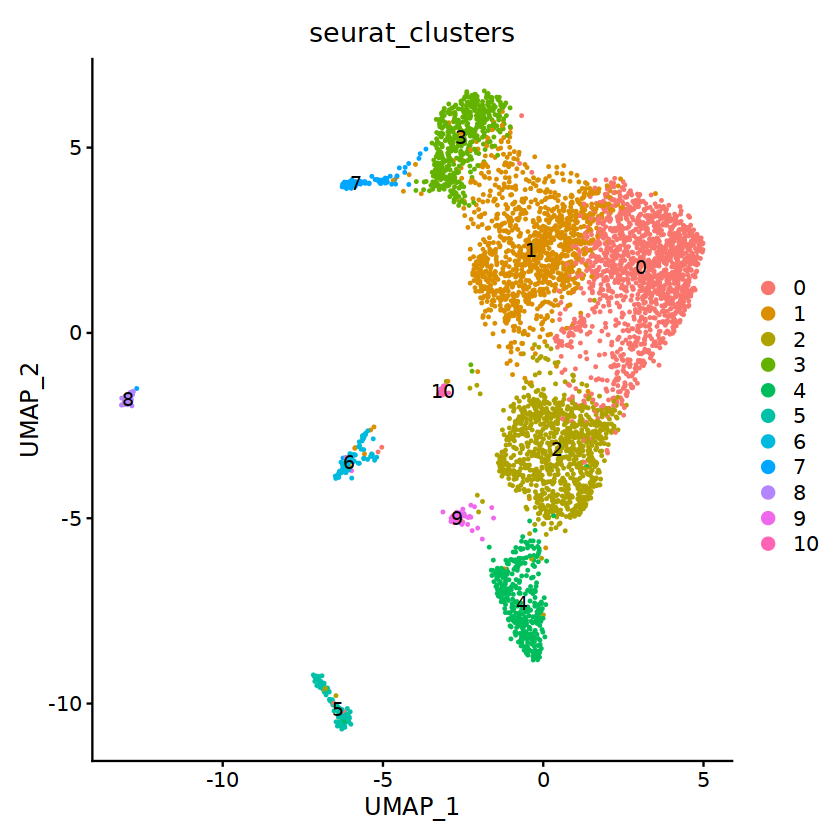

In [11]:
DimPlot(immune.combined, reduction = "umap", group.by  = "seurat_clusters",label = T)

In [342]:
options(repr.plot.width = 5,repr.plot.height = 5)

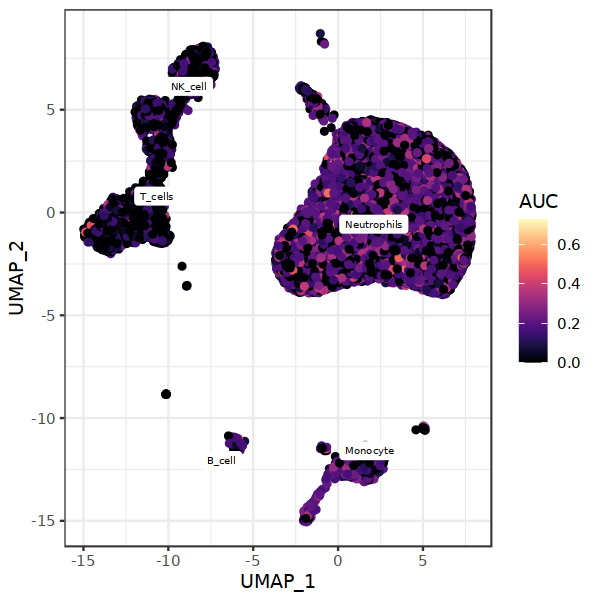

In [343]:
class_avg <- df %>%
  group_by( celltype) %>%
  summarise(
    UMAP_1 = median(UMAP_1),
    UMAP_2 = median(UMAP_2)
  )


ggplot(df, aes(UMAP_1, UMAP_2))  +
  geom_point(aes(colour  = AUC)) + viridis::scale_color_viridis(option="A") +
  ggrepel::geom_label_repel(aes(label = celltype),
                            data = class_avg,
                            size = 2,
                            label.size = 0,
                            segment.color = NA
  )+   theme(legend.position = "none") + theme_bw()

In [344]:
scd = scRNA

In [345]:
Idents(scd) = 'celltype'

In [346]:
scd@meta.data = df

In [347]:
options(repr.plot.width = 8,repr.plot.height = 5)

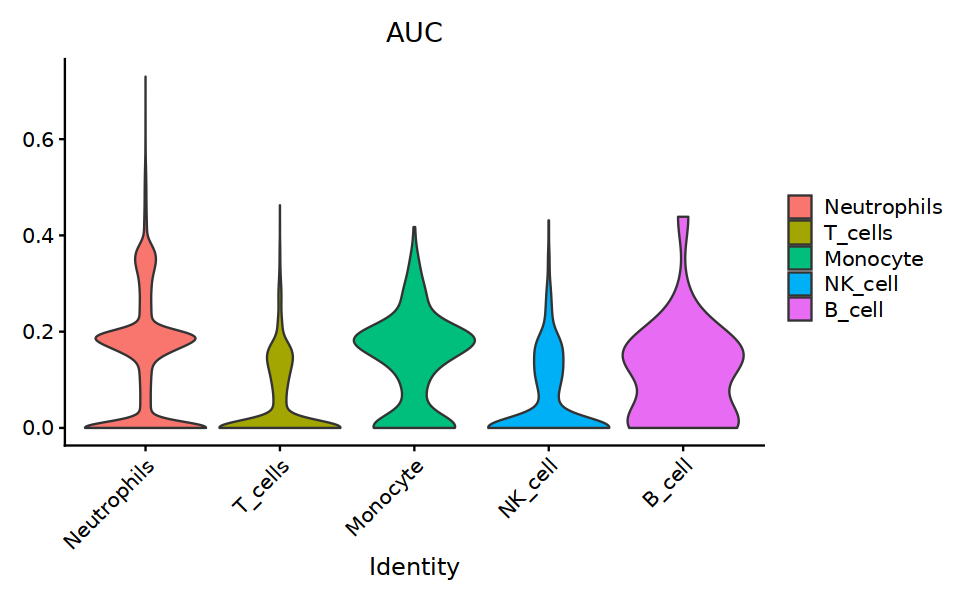

In [348]:
VlnPlot(scd,features = 'AUC',pt.size = 0)

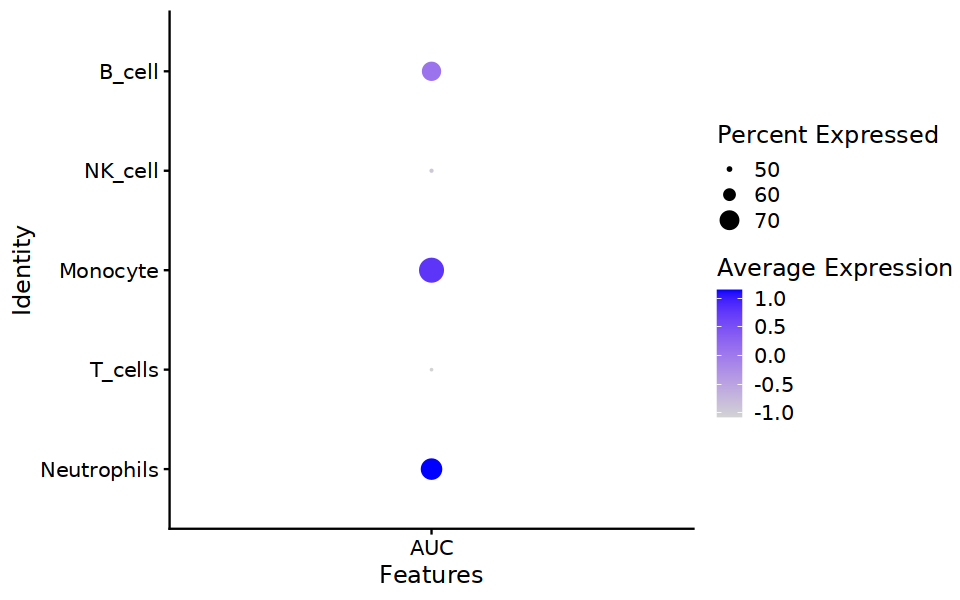

In [349]:
DotPlot(scd,features = 'AUC')

In [319]:
Idents(scd) = 'celltype'

In [256]:
# scd$celltype = gsub('[:+:]','-',scd$celltype)

In [257]:
# scd$celltype = gsub('Monocyte-CD16-','Monocyte',scd$celltype)

In [350]:
table(scd$celltype)


     B_cell    Monocyte     NK_cell Neutrophils     T_cells 
         26         512         699       62087        2466 

In [351]:
Idents(scd) = 'celltype'

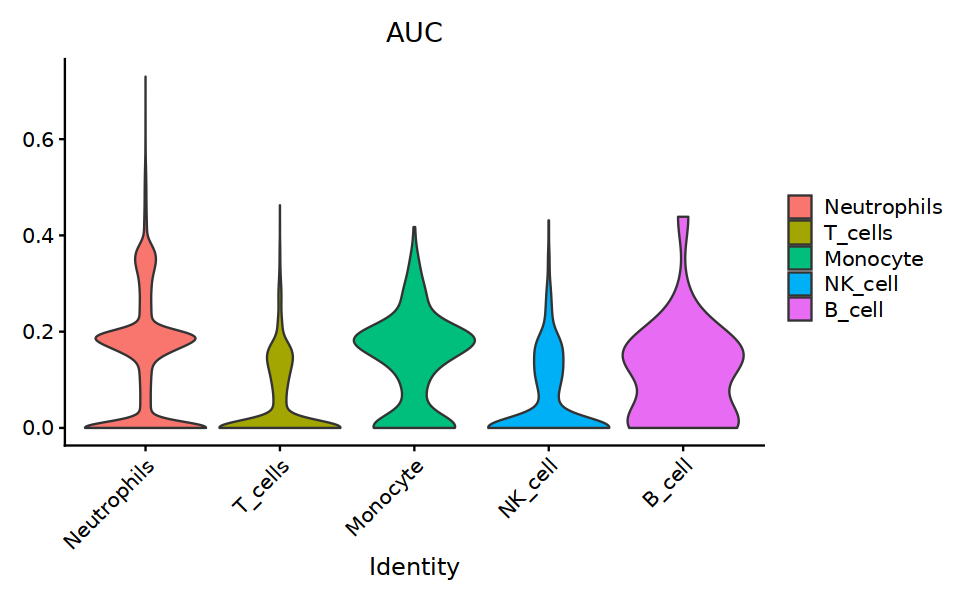

In [352]:
VlnPlot(scd,features = 'AUC',pt.size = 0)

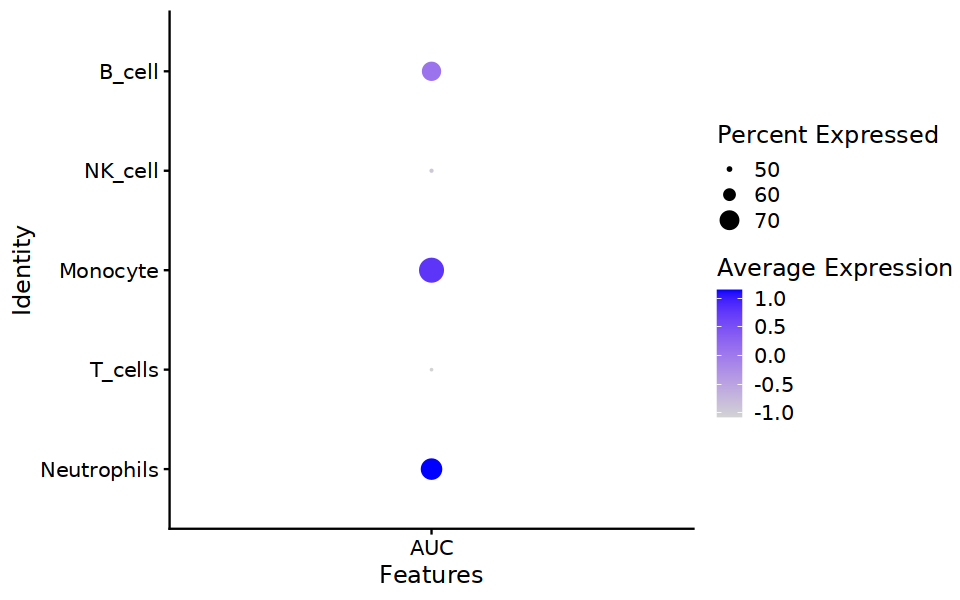

In [353]:
DotPlot(scd,features = 'AUC')

In [354]:
table(scRNA$celltype)


     B_cell    Monocyte     NK_cell Neutrophils     T_cells 
         26         512         699       62087        2466 

In [355]:
saveRDS(scRNA,file = 'scRNA.rds')

In [106]:
scRNA$group = ifelse(scRNA$orig.ident %in% c('GSM4104122_MS19270',  'GSM4104123_MS58637',  'GSM4104124_MS71658', 
                                             'GSM4104125_MS49131', 'GSM4104126_MS60249',  'GSM4104127_MS74594'),'MS','Control')

In [107]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$group)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$group)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$group), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('MS', 'Control'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
# ggplot(Cellratio) + 
#   geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
#   theme_classic() +
#   labs(x='Sample',y = 'Ratio')+
#   scale_fill_manual(values = allcolour)+
#   theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)


Control      MS 
  14730   18484 


 T_cell:CD4+_central_memory                 NK_cell:IL2 
               0.2298729451                0.0342024448 
    Monocyte:leukotriene_D4 T_cell:CD4+_effector_memory 
               0.0553983260                0.3209188896 
                T_cell:CD8+              Monocyte:CD14+ 
               0.2407418558                0.0550069248 
              B_cell:Memory          T_cell:gamma-delta 
               0.0176732703                0.0202625399 
               B_cell:Naive                 T_cell:CD4+ 
               0.0095742759                0.0156259409 
             Monocyte:CD16+ 
               0.0007225869 

                             
                              Control   MS
  T_cell:CD4+_central_memory     2796 4839
  NK_cell:IL2                     382  754
  Monocyte:leukotriene_D4        1538  302
  T_cell:CD4+_effector_memory    4412 6247
  T_cell:CD8+                    3785 4211
  Monocyte:CD14+                 1064  763
  B_cell:Memory                    54  533
  T_cell:gamma-delta              180  493
  B_cell:Naive                    114  204
  T_cell:CD4+                     381  138
  Monocyte:CD16+                   24    0

In [108]:
saveRDS(scRNA,file = 'after_rename.rds')

## 往下都是没有运行的

In [109]:
options(repr.plot.height = 6,rpr.plot.wdith = 5)

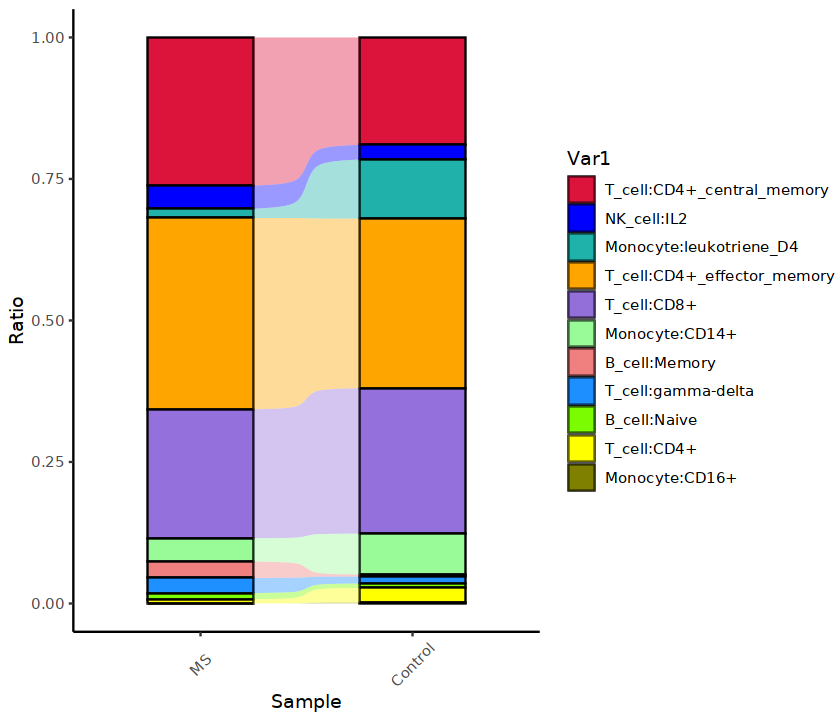

In [110]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [111]:
ggsave('figure6.pdf',height =  5,width = 4)

In [124]:
getwd()

[1] "/import/csf"

In [123]:
for (i in unique(scRNA$celltype)){
    DefaultAssay(scRNA) = 'RNA'
    Idents(scRNA) = 'celltype'
    sce = subset(scRNA,idents = i)
    DotPlot(sce,group.by = 'group',features = 'DNM1L')
    ggsave(paste0(i,'.group.pdf'))
    
}

Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number of groups may produce misleading results"
Saving 6.67 x 6.67 in image
Warning message:
"Scaling data with a low number

In [370]:
Idents(scRNA) = 'celltype'

sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)



### https://zhuanlan.zhihu.com/p/573321126
## https://zhuanlan.zhihu.com/p/594345612


Calculating cluster Neutrophils

Calculating cluster T_cells

Calculating cluster Monocyte

Calculating cluster NK_cell

Calculating cluster B_cell



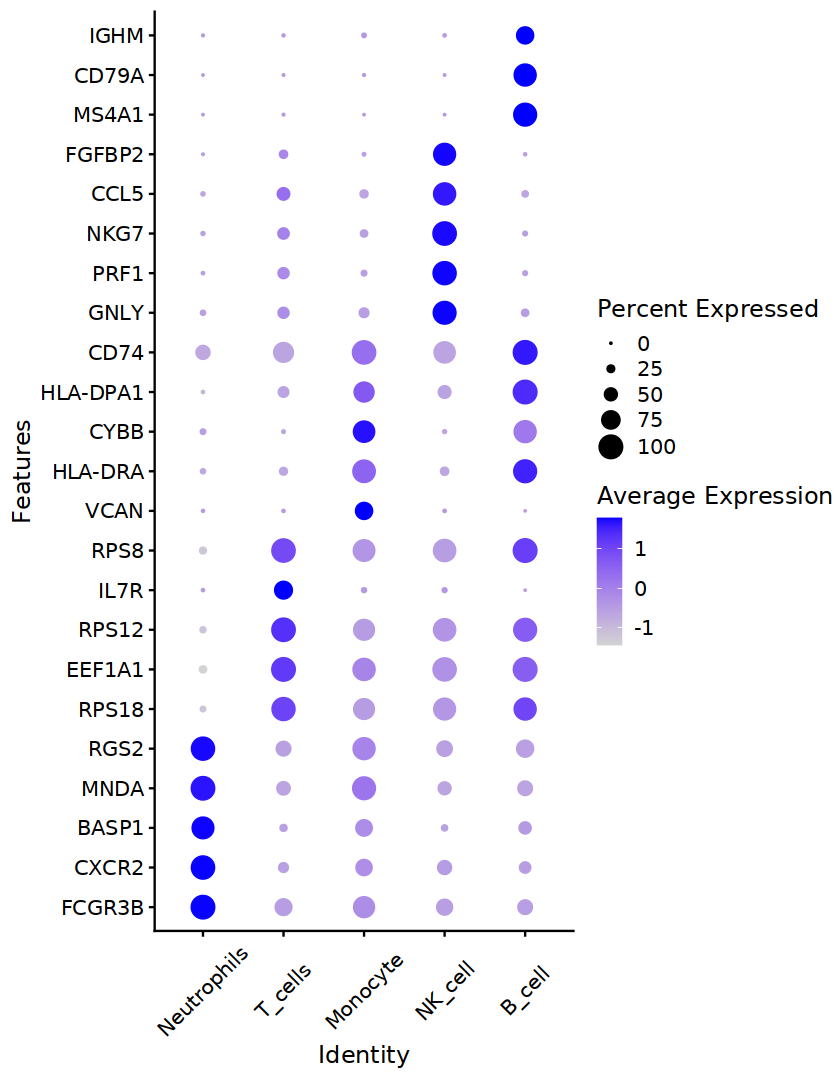

In [371]:
options(repr.plot.height = 9,repr.plot.width = 7)

 DotPlot(scRNA, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [372]:
ggsave('figure7.pdf',height =  9,width = 8)

In [373]:
library('clusterProfiler')

In [374]:
library(dplyr) 
top50 <- sce.markers %>% group_by(cluster) %>% top_n(50, avg_log2FC)

group <- data.frame(gene=top50$gene,
                    group=top50$cluster)

Gene_ID <- bitr(top50$gene, fromType="SYMBOL", 
            toType="ENTREZID", 
            OrgDb="org.Hs.eg.db")
data  <- merge(Gene_ID,group,by.x='SYMBOL',by.y='gene')
data_GO <- compareCluster(
  ENTREZID~group, 
  data=data, 
  fun="enrichGO", 
  OrgDb="org.Hs.eg.db",
  ont = "BP",
  pAdjustMethod = "BH",
  pvalueCutoff = 0.05,
  qvalueCutoff = 0.05,
  readable = TRUE
)





'select()' returned 1:1 mapping between keys and columns

Warning message in bitr(top50$gene, fromType = "SYMBOL", toType = "ENTREZID", OrgDb = "org.Hs.eg.db"):
"1.54% of input gene IDs are fail to map..."


In [375]:
data_GO_sim <- simplify(data_GO, 
                        cutoff=0.5, 
                        by="p.adjust", 
                        select_fun=min)

write.csv(data_GO_sim@compareClusterResult,file = 'enrichment.csv',row.names =F)

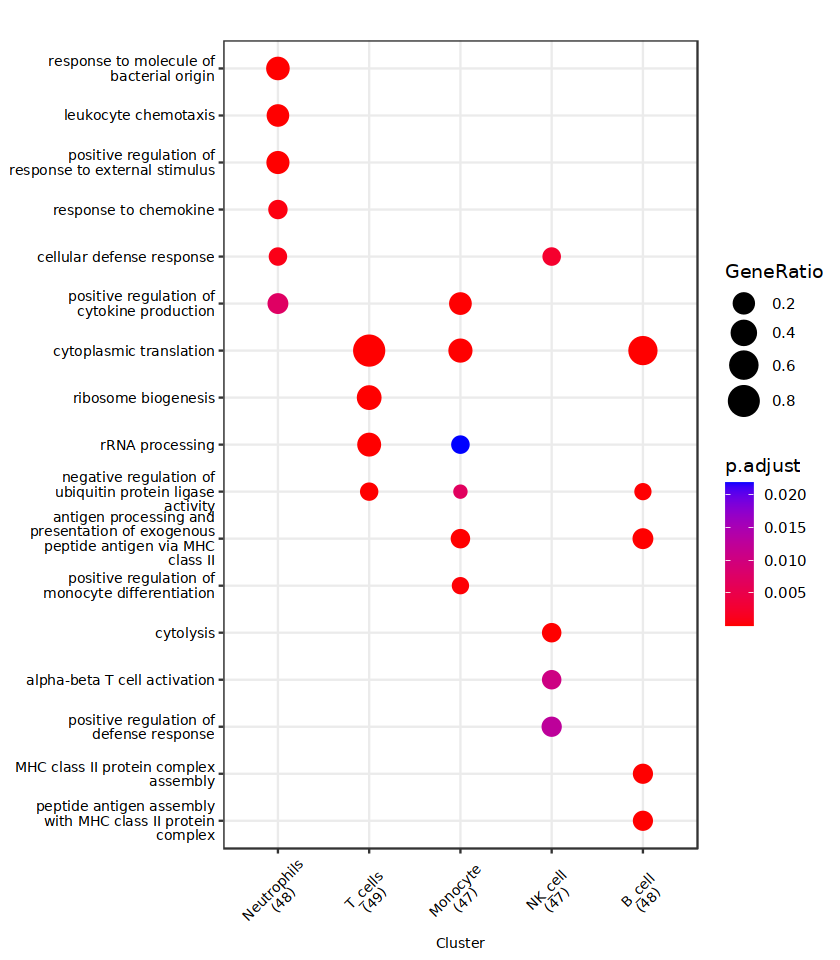

In [379]:
options(repr.plot.height = 8,repr.plot.width = 7)
enrichplot::dotplot(data_GO_sim, showCategory=4,font.size = 8)+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [377]:
ggsave('figure8.pdf',height =  9,width = 8)